### Import and data filtering from Open fact Food Database

Open Food Facts is a food products database made by everyone, for everyone.
You can use it to make better food choices, and as it is open data, anyone can re-use it for any purpose.
more information can be find on the web site: https://fr.openfoodfacts.org/ and blog: https://en.wiki.openfoodfacts.org/Main_Page  
Database grow and product update: 
![alt text](https://fr.blog.openfoodfacts.org/images/products_20180327.png")  
Source of the actual (2016-2017) [data]:  
Update can be find [here](https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv) 

In [105]:
import pandas as pd

# import data
file_name = "fr.openfoodfacts.org.products.csv"
df = pd.read_csv(file_name, sep = "\t", header = 0, low_memory=False)

# select data for France 
mask = df["countries_fr"].str.contains("France", na = False)
df = df[mask];

In [106]:
print("shape: ", df.shape)
print("list of features: ", df.columns.values)

shape:  (98440, 162)
list of features:  ['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_fr' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_fr' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_fr' 'ingredients_text' 'allergens'
 'allergens_fr' 'traces' 'traces_tags' 'traces_fr' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_fr'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_groups_1' 

### Features Selection

C:\Users\Mo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys
C:\Users\Mo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


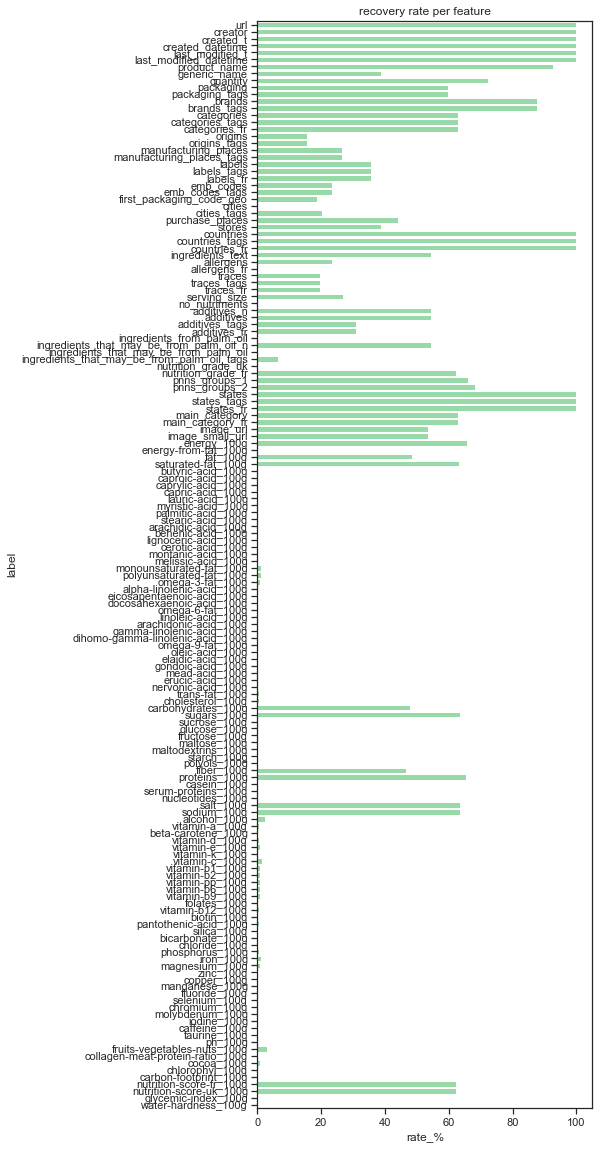

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# recovery rate per feature
buff = 100 - df.isnull().sum()/len(df) * 100
recovery = pd.DataFrame({"label": buff.index,
                         "rate_%" : buff.data})

sns.set(style="ticks", palette="pastel")

# Initialize the matplotlib figure
plt.figure(figsize=(6,20))
plt.title("recovery rate per feature")

# Plot of the recovery rate per feature
sns.barplot(x= "rate_%", y= "label", data=recovery[~mask],  # ~mask: remove marginal features
            label="Total", color="g")

In [108]:
# remove empty features (and almost empty)
cap = 0.1  # cap to define marginal feature where recovery rate is below 0.1% --> to discuss with the customer
mask = (recovery["rate_%"] < cap)
empty_feature = recovery.loc[mask, "label"]
print("Number of feature removed {}:\n{}".format(len(empty_feature),empty_feature))  
df = df.drop(columns = list(empty_feature))

Number of feature removed 56:
27                                    cities
36                              allergens_fr
41                             no_nutriments
47                 ingredients_from_palm_oil
50     ingredients_that_may_be_from_palm_oil
52                        nutrition_grade_uk
64                      energy-from-fat_100g
67                         butyric-acid_100g
68                         caproic-acid_100g
69                        caprylic-acid_100g
70                          capric-acid_100g
71                          lauric-acid_100g
72                        myristic-acid_100g
73                        palmitic-acid_100g
74                         stearic-acid_100g
75                       arachidic-acid_100g
76                         behenic-acid_100g
77                      lignoceric-acid_100g
78                         cerotic-acid_100g
79                        montanic-acid_100g
80                        melissic-acid_100g
85                eicosap

In [109]:
# selection of meaningfull and relatively complet features
# source: https://www.fourchette-et-bikini.fr/cuisine/nutrition/les-regles-de-base-de-la-dietetique-28750.html
selected_feature = ["code",
                    "url",
                    "product_name",
                    "brands",
                    "categories_fr",
                    "countries_fr",
                    "ingredients_text",
                    "additives_fr",
                    "main_category_fr",
                    "nutrition_grade_fr"]

# we keep all the _100g feature left after the recovery rate filtering
feature_100g = df.loc[:,"energy_100g":].columns.values
selected_feature = selected_feature + list(feature_100g)
df = df[selected_feature]

### Products selection

In [110]:
# look for duplicate porducts ("code" feature)
max_count = df["code"].value_counts().max()
if max_count == 1:
    print("ok, no double code")
else:
    print("!! Warning: duplicate values in code feature !!")

ok, no double code


In [111]:
# look for outliers (check if max is above 100 and min > 0)
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
energy_100g,64593.0,1171.6,12835.9,0.0,427.0,1035.0,1649.0,3251373.0
fat_100g,47642.0,13.3,16.9,0.0,1.3,6.8,21.0,380.0
saturated-fat_100g,62375.0,5.4,8.5,0.0,0.3,2.0,7.4,210.0
monounsaturated-fat_100g,1186.0,18.6,22.0,0.0,2.6,9.1,26.0,82.0
polyunsaturated-fat_100g,1205.0,9.8,15.0,0.0,1.5,3.5,11.0,75.0
omega-3-fat_100g,653.0,3.1,4.9,0.0,0.9,2.0,3.3,60.0
alpha-linolenic-acid_100g,176.0,2.1,8.0,0.0,0.1,0.1,0.6,75.0
omega-6-fat_100g,144.0,18.0,18.5,0.0,4.0,11.5,24.3,71.0
linoleic-acid_100g,144.0,3.8,6.5,0.2,0.4,0.6,3.6,25.0
trans-fat_100g,386.0,0.2,1.0,0.0,0.0,0.0,0.1,17.2


In [112]:
# remove / remplace data where weight is above 105g or below 0
feature_100g = df.loc[:,"fat_100g":"cocoa_100g"].columns.values

# replace values above 105 or below 0 by none
df_100g = df.loc[:,feature_100g]  # buffer df for next operations
mask_a = (df_100g > 105)
mask_b = (df_100g < 0)
df_100g[mask_a] = None
df_100g[mask_b] = None
df.loc[:,feature_100g] = df_100g
del df_100g

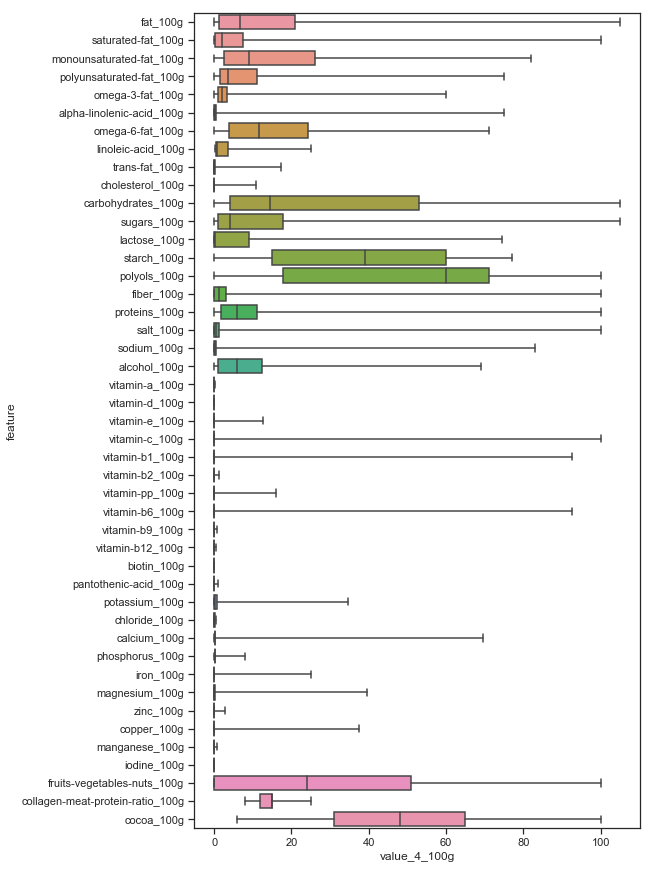

In [113]:
# Check distribution
# melt df for boxplot
df_melt = df.loc[:,feature_100g].melt(var_name= "feature", value_name="value_4_100g")
plt.figure(figsize=(8,15))
sns.boxplot(x="value_4_100g", y="feature", data=df_melt,
            whis="range")

In [125]:
# new variable Check_weight: add main nutriments (macronutriments) weights
macronutriments = ["fat_100g", "carbohydrates_100g", "fiber_100g", "proteins_100g", "salt_100g"]                       
df["check_weight"] = df.loc[:,macronutriments].sum(axis=1)

# filtering and line removal for total weight above 105g
mask = df["check_weight"] < 105
print(sum(~mask)/len(df), "% removed for incoherent weight")
df.loc[~mask, ["fat_100g","carbohydrates_100g","fiber_100g","proteins_100g","salt_100g","check_weight"]].head(5)
df = df[mask]

0.0 % removed for incoherent weight


In [117]:
# we will use the nutrition-score-fr_100g as an indicator for completness of product information
# (cannot be complet otherwise)
b = df["nutrition-score-fr_100g"].isna().sum() /df["nutrition-score-fr_100g"].size * 100
mask = df["nutrition-score-fr_100g"].isna()
df = df[~mask]
print(round(b,1),"% removed because of NaN in nutrition-score-fr_100g")

37.7 % removed because of NaN in nutrition-score-fr_100g


### Change

In [150]:
# to avoid futur search issue we will pas all categorical feature in lowercase
selected_feature = ["url",
                    "product_name",
                    "brands",
                    "categories_fr",
                    "countries_fr",
                    "ingredients_text",
                    "additives_fr",
                    "main_category_fr",
                    "nutrition_grade_fr"]

df[selected_feature] = df[selected_feature].apply(lambda x: x.str.lower())

In [153]:
# save processed dataframe
file_name = "fr.openfoodfacts.org.products.csv"
output_file_name = "processed_" + file_name
df.to_csv(output_file_name)

### Energy content check
Energy Content  
+ 1 gram of protein  =17 kJ  
+ 1 gram of fat = 37 kJ  
+ 1 gram of carbohydrates = 17 kJ  
+ 1 gram of dietary fibre = 8 kJ  
+ 1 gram of alcohol=  29 kJ  
Source: http://www.mydailyintake.net/calculating-energy/

In [119]:
df["check_energy_kj"] = (17*df["proteins_100g"].fillna(0) +
                         37*df["fat_100g"].fillna(0) +
                         17*df["carbohydrates_100g"].fillna(0) +
                         8*df["fiber_100g"].fillna(0) +
                         29*df["alcohol_100g"].fillna(0))

C:\Users\Mo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


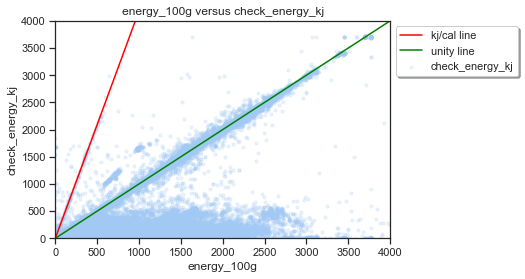

In [126]:
import numpy as np
plt.scatter("energy_100g","check_energy_kj", data = df, alpha = 0.2, s = 10)
plt.xlim(0, 4000)
plt.ylim(0, 4000)

u = np.linspace(0,4000,10)
plt.plot(u,u*4.184, c="red", label="kj/cal line")
plt.plot(u,u,c = "green",label="unity line")
plt.title("energy_100g versus check_energy_kj")
plt.xlabel("energy_100g")
plt.ylabel("check_energy_kj")
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          fancybox=True, shadow=True, ncol=1)

In [121]:
# visualisation of the data in the lowest part of the graph
mask1 = df["energy_100g"] > 2000 
mask2 = df["check_energy_kj"] < 500
mask = mask1 & mask2

df.loc[:,["proteins_100g","fat_100g","carbohydrates_100g","energy_100g","nutrition_grade_fr"]].sample(20)

,proteins_100g,fat_100g,carbohydrates_100g,energy_100g,nutrition_grade_fr
177532,25.00,24.50,2.0,1376.0,d
190273,14.40,1.70,66.0,1490.0,a
207250,7.60,14.50,66.3,1854.0,d
255238,4.90,3.50,2.2,249.0,b
264609,7.00,27.40,53.4,2074.0,d
198769,0.00,0.00,0.0,0.0,c
240961,5.70,7.60,4.2,450.0,b
214342,5.40,35.90,6.6,1544.0,c
198518,20.00,NaN,NaN,523.0,a
237155,11.50,NaN,NaN,1314.0,b
